In [11]:
%%capture
from brian2 import *
%matplotlib inline


In [2]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

# Create a neuron group with 1 neuron using the defined equations
G = NeuronGroup(1, eqs, method='exact')

# Print the initial value of v (it should be 0 by default)
print("Before simulation, v =", G.v[0])

# Run the simulation for 100 ms
run(100*ms)

# Print the final value of v (it should be close to 1)
print("After simulation, v =", G.v[0])


Before simulation, v = 0.0
After simulation, v = 0.9999546000702376


Text(0.5, 1.0, 'Evolution of v over time')

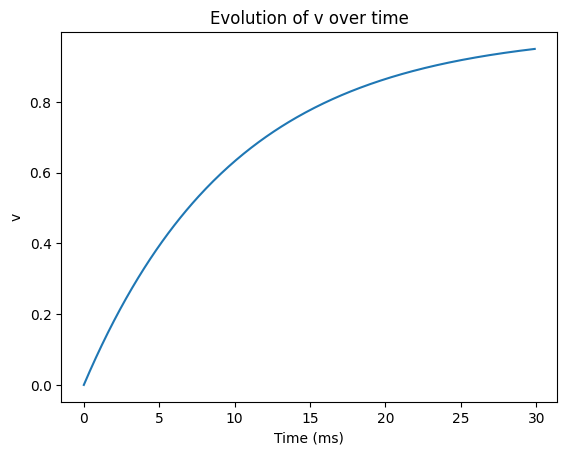

In [3]:
# Clear previous simulation objects to avoid interference
start_scope()

# Define the time constant
tau = 10*ms

# Define the differential equation for the neuron model
eqs = '''
dv/dt = (1-v)/tau : 1
'''

# Create a neuron group with one neuron using the 'exact' integration method
G = NeuronGroup(1, eqs, method='exact')

# Use a StateMonitor to record the value of 'v' over time from the neuron
M = StateMonitor(G, 'v', record=True)

# Run the simulation for 30 milliseconds
run(30*ms)

# Plot the evolution of 'v' over time
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')   # Set x-axis label
ylabel('v')           # Set y-axis label
title('Evolution of v over time')  # Set plot title


Text(0.5, 1.0, 'Comparison of Brian simulation and analytic solution')

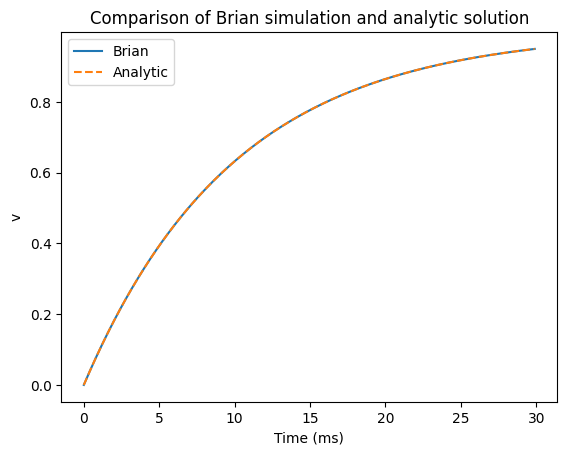

In [4]:
# Clear previous simulation objects to avoid interference
start_scope()

# Define the time constant
tau = 10*ms

# Define the differential equation for the neuron model
eqs = '''
dv/dt = (1-v)/tau : 1
'''

# Create a neuron group with one neuron using the 'exact' integration method
G = NeuronGroup(1, eqs, method='exact')

# Use a StateMonitor to record the value of 'v' over time from neuron 0
M = StateMonitor(G, 'v', record=0)

# Run the simulation for 30 milliseconds
run(30*ms)

# Plot the evolution of 'v' from the Brian simulation (blue solid line)
plot(M.t/ms, M.v[0], 'C0', label='Brian')

# Plot the analytic solution: 1 - exp(-t/tau) (orange dashed line)
plot(M.t/ms, 1 - exp(-M.t/tau), 'C1--', label='Analytic')

# Label the axes and add a legend
xlabel('Time (ms)')
ylabel('v')
legend()
title('Comparison of Brian simulation and analytic solution')


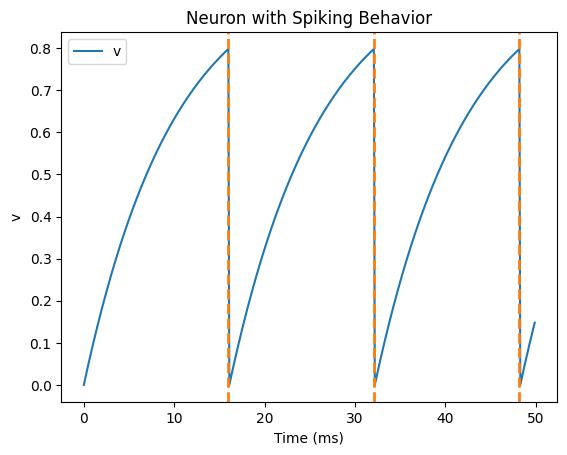

In [5]:
# Clear previous simulation objects to avoid interference
start_scope()

# Define the time constant
tau = 10*ms

# Define the differential equation for the neuron model
eqs = '''
dv/dt = (1-v)/tau : 1
'''

# Create a neuron group with 1 neuron
# Add a threshold: when v > 0.8, the neuron fires a spike
# Reset the variable v to 0 immediately after a spike
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

# Use a StateMonitor to record the variable 'v' over time
M = StateMonitor(G, 'v', record=0)

# Use a SpikeMonitor to record the times when spikes occur
spikemon = SpikeMonitor(G)

# Run the simulation for 50 milliseconds
run(50*ms)

# Plot the evolution of 'v' over time
plot(M.t/ms, M.v[0], label='v')

# Plot vertical dashed lines at each spike time
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=2)

xlabel('Time (ms)')   # Label for x-axis
ylabel('v')           # Label for y-axis
title('Neuron with Spiking Behavior')  # Title of the plot
legend()              # Add a legend to the plot


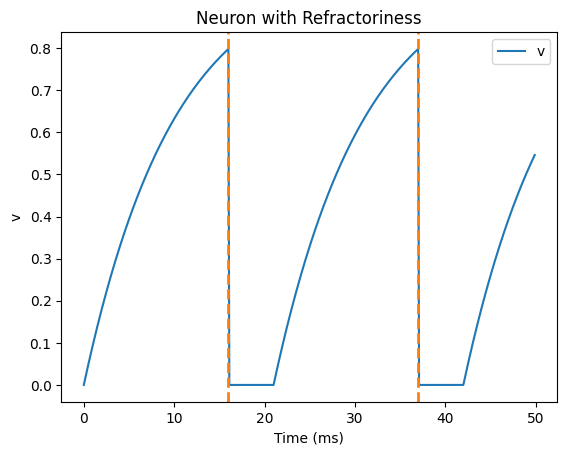

In [6]:
# Clear previous simulation objects to avoid interference
start_scope()

# Define the time constant
tau = 10*ms

# Define the differential equation with a refractory condition:
# The equation is not applied during the refractory period.
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

# Create a neuron group with 1 neuron
# Add a threshold: when v > 0.8, the neuron fires a spike
# Reset v to 0 immediately after a spike
# Set a refractory period of 5 ms
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=5*ms, method='exact')

# Use a StateMonitor to record 'v' over time from neuron 0
statemon = StateMonitor(G, 'v', record=0)

# Use a SpikeMonitor to record the times of spikes
spikemon = SpikeMonitor(G)

# Run the simulation for 50 milliseconds
run(50*ms)

# Plot the evolution of 'v' over time
plot(statemon.t/ms, statemon.v[0], label='v')

# Plot vertical dashed lines at each spike time
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=2)

xlabel('Time (ms)')   # Label for x-axis
ylabel('v')           # Label for y-axis
title('Neuron with Refractoriness')  # Title of the plot
legend()              # Add a legend


Text(0.5, 1.0, 'Raster plot of multiple neurons')

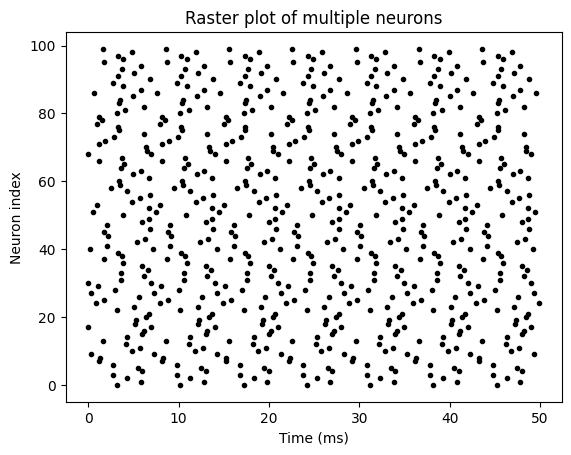

In [7]:
# Clear previous simulation objects to avoid interference
start_scope()

# Set the number of neurons
N = 100

# Define the time constant
tau = 10*ms

# Define the differential equation for the neuron model
# Here, dv/dt is defined such that each neuron evolves with the same dynamics.
eqs = '''
dv/dt = (2-v)/tau : 1
'''

# Create a neuron group with N neurons using the 'exact' integration method
# Set a threshold: when v > 1, the neuron fires a spike
# Reset v to 0 after the spike.
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

# Initialize the membrane potential 'v' with a random value for each neuron
G.v = 'rand()'

# Use a SpikeMonitor to record the spike times and neuron indices
spikemon = SpikeMonitor(G)

# Run the simulation for 50 milliseconds
run(50*ms)

# Plot the raster plot: spike times on the x-axis and neuron index on the y-axis
plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')         # Label for x-axis
ylabel('Neuron index')      # Label for y-axis
title('Raster plot of multiple neurons')  # Title of the plot


Text(0.5, 1.0, 'I-F curve')

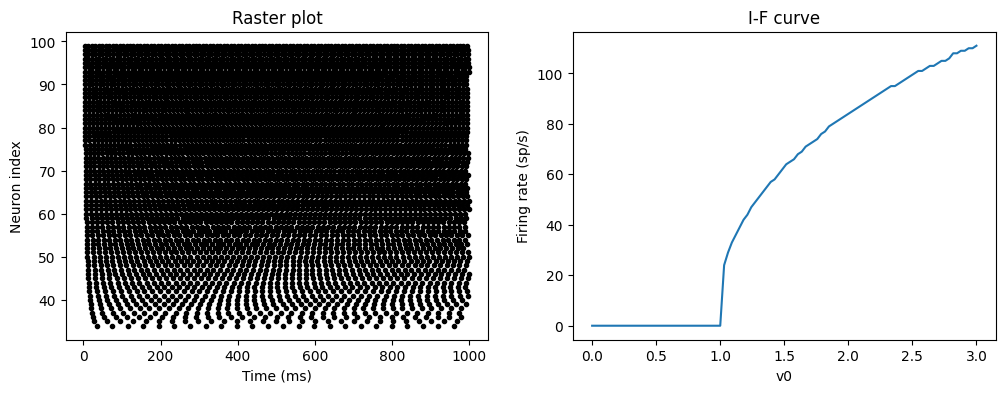

In [8]:
# Clear previous simulation objects to avoid interference
start_scope()

# Set the number of neurons
N = 100

# Define the time constant
tau = 10*ms

# Set the maximum value for the parameter v0 and the simulation duration
v0_max = 3.
duration = 1000*ms

# Define the differential equations for the neuron model:
# 'dv/dt' evolves based on the difference between v0 and v,
# and we record a per-neuron parameter 'v0'
eqs = '''
dv/dt = (v0 - v)/tau : 1 (unless refractory)
v0 : 1
'''

# Create a group of N neurons using the 'exact' method
# Set a threshold: when v > 1, the neuron fires a spike
# Reset v to 0 after a spike and impose a refractory period of 5 ms
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='exact')

# Use a SpikeMonitor to record spike times and neuron indices
M = SpikeMonitor(G)

# Initialize the parameter v0 for each neuron so that it ranges from 0 to v0_max.
# The symbol 'i' is the index of the neuron.
G.v0 = 'i*v0_max/(N-1)'

# Run the simulation for the specified duration
run(duration)

# Plotting: create a figure with two subplots
figure(figsize=(12,4))

# Subplot 1: Raster plot of spike times
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')         # Label for x-axis
ylabel('Neuron index')      # Label for y-axis
title('Raster plot')        # Title of the raster plot

# Subplot 2: I-F curve showing firing rate versus parameter v0.
# M.count is the number of spikes each neuron fired during the simulation.
# Dividing by 'duration' gives the firing rate (in spikes per second).
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')                # Label for x-axis (parameter v0)
ylabel('Firing rate (sp/s)') # Label for y-axis
title('I-F curve')          # Title of the I-F curve plot


Text(0.5, 1.0, 'I-F curve with noise')

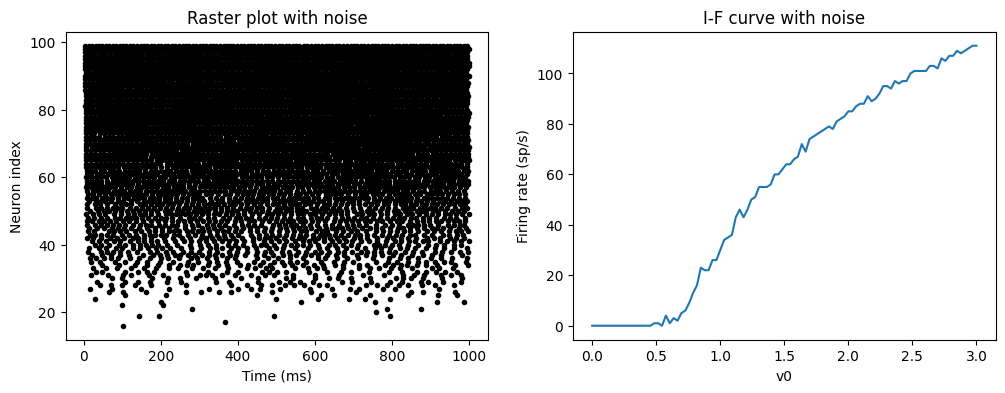

In [9]:
# Clear previous simulation objects to avoid interference
start_scope()

# Set the number of neurons
N = 100

# Define the time constant
tau = 10*ms

# Set the maximum value for the parameter v0, simulation duration, and noise strength sigma
v0_max = 3.
duration = 1000*ms
sigma = 0.2

# Define the differential equations for the neuron model with a stochastic term:
# 'dv/dt' evolves based on (v0 - v)/tau plus a noise term (sigma * xi * tau**-0.5)
# 'v0' is a per-neuron parameter
eqs = '''
dv/dt = (v0 - v)/tau + sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''

# Create a group of N neurons using the Euler method (suitable for stochastic equations)
# Set a threshold: when v > 1, the neuron fires a spike
# Reset v to 0 after a spike and impose a refractory period of 5 ms
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')

# Use a SpikeMonitor to record spike times and neuron indices
M = SpikeMonitor(G)

# Initialize the parameter v0 for each neuron so that it ranges linearly from 0 to v0_max
G.v0 = 'i*v0_max/(N-1)'

# Run the simulation for the specified duration
run(duration)

# Plotting: create a figure with two subplots
figure(figsize=(12,4))

# Subplot 1: Raster plot showing spike times for each neuron
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')         # Set x-axis label
ylabel('Neuron index')      # Set y-axis label
title('Raster plot with noise')  # Title for the raster plot

# Subplot 2: I-F curve showing firing rate versus parameter v0
# M.count holds the number of spikes each neuron fired, divided by 'duration' gives the firing rate
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')                # Set x-axis label (parameter v0)
ylabel('Firing rate (sp/s)') # Set y-axis label (firing rate)
title('I-F curve with noise')  # Title for the I-F curve plot


Text(0.5, 1.0, 'Advanced neuron model')

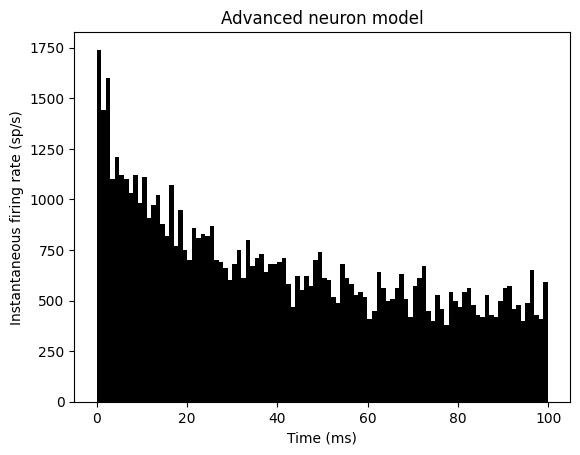

In [10]:
# Clear previous simulation objects to avoid interference
start_scope()

# Set the number of neurons
N = 1000

# Define parameters for the model:
tau = 10*ms           # Membrane time constant
vr = -70*mV           # Resting potential
vt0 = -50*mV          # Baseline threshold potential
delta_vt0 = 5*mV      # Increase in threshold after a spike
tau_t = 100*ms        # Time constant for threshold decay
sigma = 0.5*(vt0-vr)   # Noise strength related to voltage difference
v_drive = 2*(vt0-vr)   # Driving voltage input
duration = 100*ms     # Duration of the simulation

# Define the differential equations:
# - dv/dt describes the evolution of the membrane potential 'v'
# - dvt/dt describes the evolution of the threshold 'vt'
eqs = '''
dv/dt = (v_drive + vr - v)/tau + sigma*xi*tau**-0.5 : volt
dvt/dt = (vt0 - vt)/tau_t : volt
'''

# Define the reset condition:
# After a spike, reset 'v' to the resting potential and increase 'vt' by delta_vt0.
reset = '''
v = vr
vt += delta_vt0
'''

# Create a neuron group with N neurons using the Euler method (suitable for stochastic differential equations)
# The threshold condition is 'v > vt'
# A refractory period of 5 ms is imposed.
G = NeuronGroup(N, eqs, threshold='v>vt', reset=reset, refractory=5*ms, method='euler')

# Use a SpikeMonitor to record spike times for analysis
spikemon = SpikeMonitor(G)

# Initialize the neurons:
# Set the membrane potential 'v' randomly between vr and vt0 for each neuron
G.v = 'rand()*(vt0 - vr) + vr'
# Initialize the threshold 'vt' to its baseline value vt0 for each neuron
G.vt = vt0

# Run the simulation
run(duration)

# Plot a histogram of the spike times to visualize the instantaneous firing rate.
# The histogram bins are set to 100, and the weights normalize the counts to obtain a rate.
_ = hist(spikemon.t/ms, 100, histtype='stepfilled', facecolor='k',
         weights=list(ones(len(spikemon))/(N*defaultclock.dt)))
xlabel('Time (ms)')                   # Label for x-axis
ylabel('Instantaneous firing rate (sp/s)')  # Label for y-axis
title('Advanced neuron model')        # Title of the plot
